In [6]:
import planetspy as ps
import planetspy.engines as eng
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [4]:
class record:
    loc = []
    locma = []
    def __init__(self, bodies, masslessbodies=None):
        self.loc.append(np.copy(bodies[0][::,0:3]))
        if masslessbodies:
            self.locma.append(np.copy(masslessbodies[0][::,0:3]))
    def run(self, simclass):
        self.loc.append(np.copy(simclass.bodies[0][::,0:3]))
        if simclass.masslessbodies:
            self.locma.append(np.copy(simclass.masslessbodies[0][::,0:3]))
        return False

bodies = [
    np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.371*10**6, 5.972*10**24],
              [6.371*10**6 + 385*10**6, 0, 0, 0, 10**3, 0, 1737.5*10**3, 7.35*10**22]
             ])
    , [["Earth", "r-"], ["Moon", "m-"]]
]

massless = [
    np.array([[0, 6.371*10**6 + 400*10**3, 0, -10600, 0, 0, 1, 1000]]),
    [["ISS", "b-"]]
]

recinst = record(bodies, massless)
sim = ps.Simulate(eng.PP, 100, 10, bodies, masslessbodies=massless, bailout=60*60*24*30, envmod=[recinst])
sim.main_loop()
sim.steps

259200.0

<IPython.core.display.Javascript object>


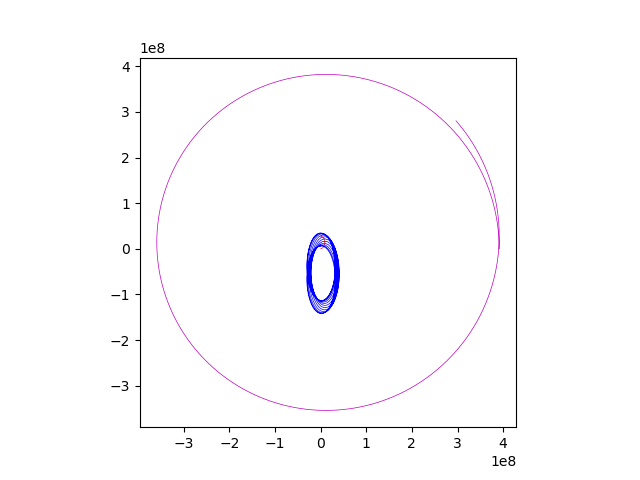

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

for j in range(0,len(bodies[0])):
    ax.plot([i[j][0] for i in recinst.loc], [i[j][1] for i in recinst.loc], bodies[1][j][1], linewidth = .5)
for j in range(0,len(massless[0])):
    ax.plot([i[j][0] for i in recinst.locma], [i[j][1] for i in recinst.locma], massless[1][j][1], linewidth = .5)

ax.set_aspect("equal")
plt.show()